<a href="https://colab.research.google.com/github/MuGrahiman/ML-Transaction-Fraud-Detection/blob/main/FruadDetectionInTransaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load dataset
import pandas as pd
data=pd.read_csv("/content/sample_data/creditcard.csv")

In [21]:
# Print column names to verify 'Class' exists
print("Column names in dataset:")
print(data.columns)

Column names in dataset:
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [26]:

# Find the actual column name for 'Class'
class_column = [col for col in data.columns if "class" in col.lower()]


In [25]:

if not class_column:
    raise KeyError("Error: 'Class' column not found! Available columns: " + str(data.columns))


In [4]:

# Extract features and target variable
X = data.drop(columns=class_column)  # Drop 'Class' column dynamically
y = data[class_column[0]]  # Use the actual name found



In [7]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
print(y_train.isnull().sum())  # Count missing values in y_train
print(y_test.isnull().sum())   # Count missing values in y_test


1
0


In [12]:
X_train = X_train[~y_train.isna()]
y_train = y_train.dropna()


In [28]:
y_train.fillna(1, inplace=True)  # Assume missing values mean "Fraud"


In [29]:
print(y_train.dtype)


int64


In [30]:
y_train = y_train.astype(int)


In [31]:
# Train model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [32]:
print(y_train.isnull().sum())  # Count missing values in y_train
print(y_test.isnull().sum())   # Count missing values in y_test


0
0


In [33]:
# Make predictions
predictions = model.predict(X_test)


In [34]:
# Convert predictions to "Fraud" or "Not Fraud"
output = ["Fraud" if pred == 1 else "Not Fraud" for pred in predictions]



In [38]:
# Print results
for i, result in enumerate(output[:20]):  # Print first 20 predictions
    print(f"Transaction {i+1}: {result}")

Transaction 1: Not Fraud
Transaction 2: Not Fraud
Transaction 3: Not Fraud
Transaction 4: Not Fraud
Transaction 5: Not Fraud
Transaction 6: Not Fraud
Transaction 7: Not Fraud
Transaction 8: Not Fraud
Transaction 9: Not Fraud
Transaction 10: Not Fraud
Transaction 11: Not Fraud
Transaction 12: Not Fraud
Transaction 13: Not Fraud
Transaction 14: Not Fraud
Transaction 15: Not Fraud
Transaction 16: Not Fraud
Transaction 17: Not Fraud
Transaction 18: Not Fraud
Transaction 19: Not Fraud
Transaction 20: Not Fraud


In [41]:
# Evaluate model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, predictions))
print('Confusion Matrix:')
print(confusion_matrix(y_test, predictions))


Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5541
         1.0       0.95      0.87      0.91        23

    accuracy                           1.00      5564
   macro avg       0.98      0.93      0.95      5564
weighted avg       1.00      1.00      1.00      5564

Confusion Matrix:
[[5540    1]
 [   3   20]]


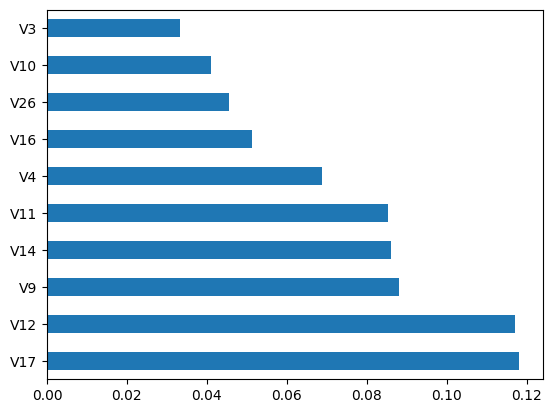

In [43]:
# Visualizing feature importance
import matplotlib.pyplot as plt

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()